In [1]:
# Set up libraries, etc.
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import scipy.stats as ss
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multitest import multipletests
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu

PROJECT_DIR = '/scratch/groups/dpwall/personal/briannac/sequence_based_biomarkers'
PLOT_DIR =  '/scratch/groups/dpwall/personal/briannac/sequence_based_biomarkers/figs/'
np.random.seed(42)

# FDR Plots

## Obesity

species
0.03484320557491289
10
genus
0.06741573033707865
12
family
0.15
9
order


/home/users/briannac/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide


0.12121212121212122
4
class
0.21428571428571427
3
1-SBB
0.0325
13
2-SBB
0.013302103588474456
301
3-SBB
0.0060137230843764315
2284


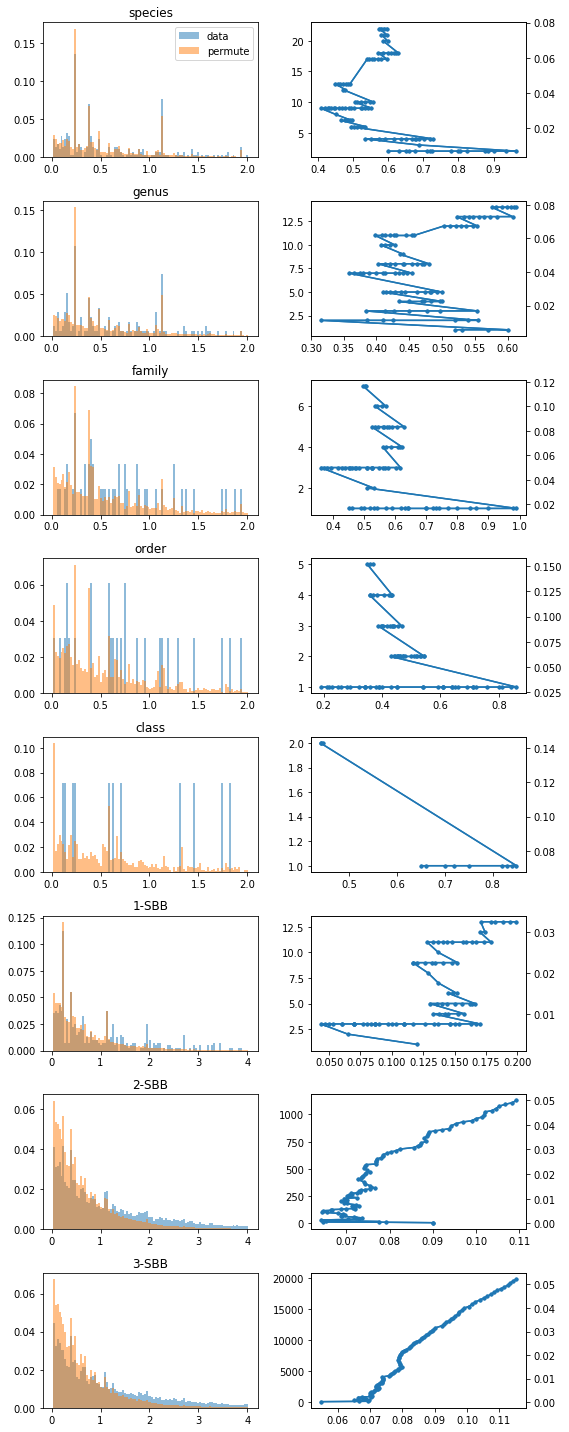

In [12]:
PLOT_DIR = '/scratch/groups/dpwall/personal/briannac/sequence_based_biomarkers/figs/'
x_i = -1
f, ax = plt.subplots(nrows=8,ncols=2, figsize=(8,20))
for tax in ['species', 'genus','family', 'order', 'class', '1-SBB', '2-SBB', '3-SBB']:
    x_i = x_i + 1
    print(tax)
    data = np.load('/scratch/groups/dpwall/personal/briannac/sequence_based_biomarkers/results/sig_values/obese_lean_twins_U_data_%s.npy' % tax)
    permute = np.load('/scratch/groups/dpwall/personal/briannac/sequence_based_biomarkers/results/sig_values/obese_lean_twins_U_permute_%s.npy' % tax)
    
    if tax=='1-SBB': min_bin=4
    elif tax == '2-SBB': min_bin=4
    elif tax=='3-SBB': min_bin=4
    else: min_bin=2
        
    
    counts, bins = np.histogram(-np.log10(2*data),bins=np.linspace(0,min_bin,100))
    ax[x_i][0].bar(bins[1:], counts/len(data), width=(bins[1]-bins[0]), alpha=.5, label='data')
    counts, bins = np.histogram(-np.log10(2*permute),bins=np.linspace(0,min_bin,100))
    ax[x_i][0].bar(bins[1:], counts/len(permute), width=(bins[1]-bins[0]), alpha=.5, label='permute')
    #ax[x_i,0].set_title(tax)
    #plt.xlabel('-log10(p-value)')
    #plt.ylabel('% taxa')
    if tax=='species':
        ax[x_i][0].legend()
    print(sum(data<=(.025/len(data)))/len(data))
    print(sum(data<=(.025/len(data))))
    
    n_data, p_data = np.histogram(np.log10(data), bins=np.linspace(-min_bin*2,-min_bin,100))
    n_permute, p_permute = np.histogram(np.log10(permute), bins=np.linspace(-min_bin*2,-min_bin,100))

    fdr = np.cumsum(n_permute)/100/np.cumsum(n_data)
    #for i in range(1,len(fdr)-1):
        #if np.nanmax(fdr[:i])>=fdr[i]:
   #     if np.nanmin(fdr[i:])!=fdr[i]:#>fdr[i+1]:
   #         fdr[i] = -1
   #         n_data[i] = -1

    fdr=fdr[fdr!=-1]
    n_data=n_data[n_data!=-1]
    ax[x_i][1].plot(fdr, np.cumsum(n_data), '.-')
    
    ax[x_i][0].set_title(tax)
    #ax.set_xlabel('FDR')
    #ax.set_ylabel('# signficant taxa')
    ax2 = ax[x_i][1].twinx()
    ax2.plot(fdr, np.cumsum(n_data)/len(data), '.-')
    #ax2.set_xlabel('% significant taxa')
plt.tight_layout()
plt.savefig(PLOT_DIR + 'obese_lean_twins_FDR.png')
plt.show()
    

## Yogurt

species
0.00024524294066113466
genus
2.80859843165726e-09
family
5.315171903683903e-05


/home/users/briannac/.local/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/home/users/briannac/.local/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


order
0.001662147394026825
class
0.015074755176413077
1-SBB
6.800564396403528e-06
2-SBB
3.633705850138782e-06
3-SBB
2.6624154614598683e-05


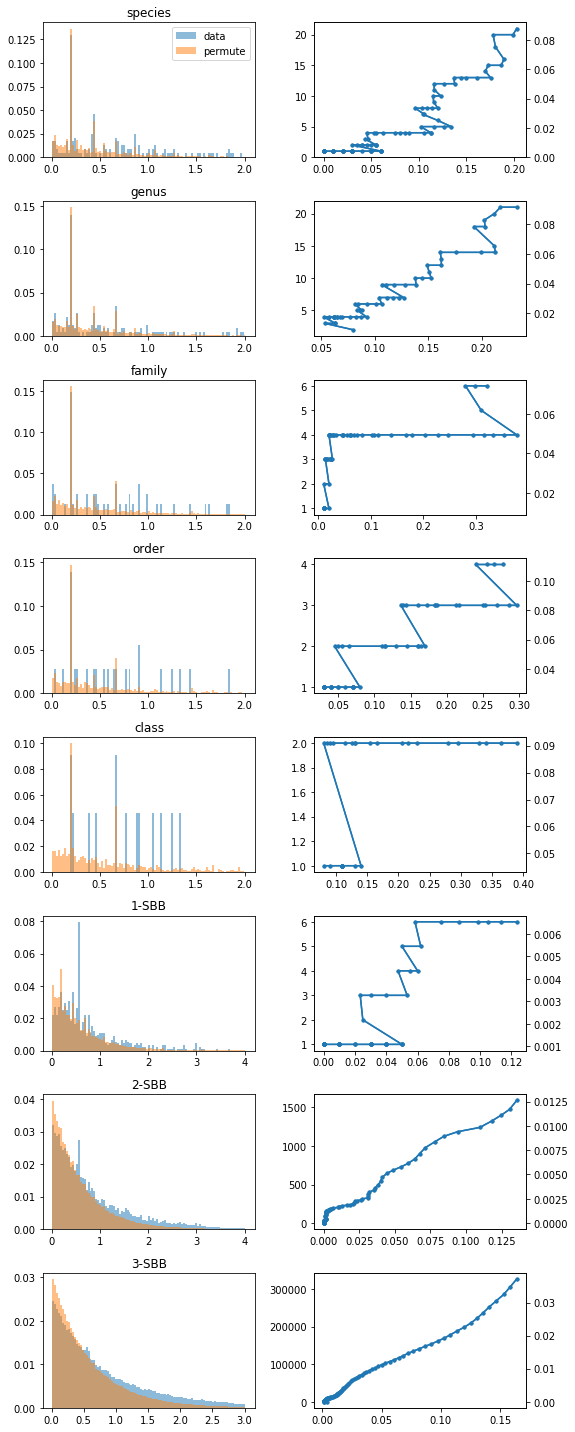

In [13]:
PLOT_DIR = '/scratch/groups/dpwall/personal/briannac/sequence_based_biomarkers/figs/'
x_i = -1
f, ax = plt.subplots(nrows=8,ncols=2, figsize=(8,20))
for tax in ['species', 'genus','family', 'order', 'class', '1-SBB', '2-SBB', '3-SBB']:
    x_i = x_i + 1
    print(tax)
    data = np.load('/scratch/groups/dpwall/personal/briannac/sequence_based_biomarkers/results/sig_values/yogurt_R_data_%s.npy' % tax)
    print(min(data)*len(data))
    
    if tax=='3-SBB':
        n_iter = 46+(99-68)
        permute = np.concatenate(
            [np.load('/scratch/groups/dpwall/personal/briannac/sequence_based_biomarkers/results/sig_values/yogurt_R_permute_3-SBB_68_100.npy')] +
            [np.load('/scratch/groups/dpwall/personal/briannac/sequence_based_biomarkers/results/sig_values/yogurt_R_permute_small%s_iter%i.npy' %
                        ('3-SBB',int(i))) for i in (list(range(45)))])
        permute = permute[permute!=0]
    else:
        permute = np.load('/scratch/groups/dpwall/personal/briannac/sequence_based_biomarkers/results/sig_values/yogurt_R_permute_%s.npy' % tax)
        n_iter = 100
    if tax=='1-SBB': min_bin=4
    elif tax == '2-SBB': min_bin=4
    elif tax=='3-SBB': min_bin=3
    else: min_bin=2
        
    
    counts, bins = np.histogram(-np.log10(2*data),bins=np.linspace(0,min_bin,100))
    ax[x_i][0].bar(bins[1:], counts/len(data), width=(bins[1]-bins[0]), alpha=.5, label='data')
    counts, bins = np.histogram(-np.log10(2*permute),bins=np.linspace(0,min_bin,100))
    ax[x_i][0].bar(bins[1:], counts/len(permute), width=(bins[1]-bins[0]), alpha=.5, label='permute')
    if tax=='species':
        ax[x_i][0].legend()
    
    n_data, p_data = np.histogram(np.log10(data), bins=np.linspace(-min_bin*3,-min_bin,100))
    n_permute, p_permute = np.histogram(np.log10(permute), bins=np.linspace(-min_bin*3,-min_bin,100))

    fdr = np.cumsum(n_permute)/n_iter/np.cumsum(n_data)
    #for i in range(1,len(fdr)-1):
    #    if np.nanmin(fdr[i:])!=fdr[i]:#>fdr[i+1]:
    #        fdr[i] = -1
    #        n_data[i] = -1

    fdr=fdr[fdr!=-1]
    n_data=n_data[n_data!=-1]
    ax[x_i][1].plot(fdr, np.cumsum(n_data), '.-')
    
    ax[x_i][0].set_title(tax)
    ax2 = ax[x_i][1].twinx()
    ax2.plot(fdr, np.cumsum(n_data)/len(data), '.-')
plt.tight_layout()
plt.savefig(PLOT_DIR + 'yogurt_FDR.png')
plt.show()
    

In [58]:
permute[permute!=0]

array([0.31731051, 0.31731051, 0.31731051, ..., 0.8819326 , 0.8819326 ,
       0.87669449])

# Case Study 1: Project Yogurt/Autism Data

## Set up.

### Tables


In [2]:
study = 'yogurt'
msa_method = 'DECIPHER'
otus = pd.read_csv(PROJECT_DIR + '/data/' + study + '/otu.tsv', sep='\t')
otus.apply(lambda x: x/sum(x), axis=1).to_csv(
    PROJECT_DIR + '/data/' + study + '/abundance.tsv', sep='\t')
tax_table = pd.read_csv(PROJECT_DIR + '/data/' + study + '/tax_table.tsv', sep='\t')

abundance = pd.read_csv(PROJECT_DIR + '/data/' + study + '/abundance.tsv', sep='\t')
person_vs_pheno = pd.read_csv(PROJECT_DIR + '/data/' + study + '/sample_data.tsv', sep='\t')
abundance.index = abundance['Unnamed: 0']
abundance = abundance.drop('Unnamed: 0', axis=1)

person_vs_pheno = pd.read_csv(PROJECT_DIR + '/data/' + study + '/sample_data.tsv', sep='\t')
pairs_counts = Counter([(a,b) for a,b in zip(person_vs_pheno['family'], person_vs_pheno['timepoint'])])
individual_counts = Counter([(a,b,c) for a,b,c in zip(person_vs_pheno['family'], person_vs_pheno['timepoint'], person_vs_pheno['phenotype'])])
good_pairs = [(fam, time) for fam,time in pairs_counts.keys() if (pairs_counts[(fam,time)]==2) & (individual_counts[(fam,time,'A')]==1) & (individual_counts[(fam,time,'N')]==1)]
good_pairs_ids = [(i,j) in good_pairs for i,j in zip(person_vs_pheno['family'], person_vs_pheno['timepoint'])]
person_vs_pheno = person_vs_pheno[good_pairs_ids]
person_vs_pheno = person_vs_pheno.sort_values(['family', 'timepoint', 'phenotype'])
person_vs_pheno['pheno'] = person_vs_pheno['phenotype']=='A'

# Taxa aggregated by taxa category
tax_table = tax_table.loc[pd.read_csv(PROJECT_DIR + '/data/yogurt/DECIPHER_taxa_vs_variants.tsv', '\t').index] # Fix tax table indexing issue for Yogurt data.

true_phenos = person_vs_pheno['pheno'].values

### Taxa aggregated by SBB or taxa category

## Statistical Tests

## Clusters of signficant SBBs

In [3]:
title='3-SBB'
study='yogurt'
msa_method = 'DECIPHER'
U_data = np.load(PROJECT_DIR + '/results/sig_values/' + study +'_' + 'R_data' + title + '.npy')
#U_permute = np.load(PROJECT_DIR + '/results/sig_values/' + study +'_' + 'R_permute' + title + '.npy')
#U_threshs = np.linspace(0,.01,1000)
U_thresh = .05/len(U_data)
#U_thresh = U_threshs[fdr<.05][0]
idx_sig_biomarkers = np.where(U_data<=U_thresh)[0]
biomarkers = pd.read_csv('/scratch/groups/dpwall/personal/briannac/sequence_based_biomarkers/results/person_biomarker/yogurt_DECIPHER_biomarkers3_unique.npy',
               sep='\t').iloc[idx_sig_biomarkers]

taxa_variants = pd.read_csv('/scratch/groups/dpwall/personal/briannac/sequence_based_biomarkers/data/yogurt/DECIPHER_taxa_vs_variants_unique.tsv', sep='\t')
taxa_variants.index = taxa_variants['Unnamed: 0']
taxa_variants = taxa_variants.drop(['Unnamed: 0'], axis=1)

sig_biomarkers = np.zeros((len(biomarkers),len(taxa_variants)))
for i, (x,y,z) in enumerate(zip(biomarkers['0'].values, 
                                biomarkers['1'].values, 
                                biomarkers['2'].values)):
    sig_biomarkers[i,:] = (taxa_variants[taxa_variants.columns[x]] & taxa_variants[taxa_variants.columns[y]] & taxa_variants[taxa_variants.columns[z]])
sig_biomarkers = pd.DataFrame(sig_biomarkers)
sig_biomarkers = sig_biomarkers[sig_biomarkers.columns[sig_biomarkers.sum(axis=0)>0]]
sig_biomarkers = sig_biomarkers.loc[sig_biomarkers.sum(axis=1)>0]#
print(np.shape(sig_biomarkers))

(3642, 2699)


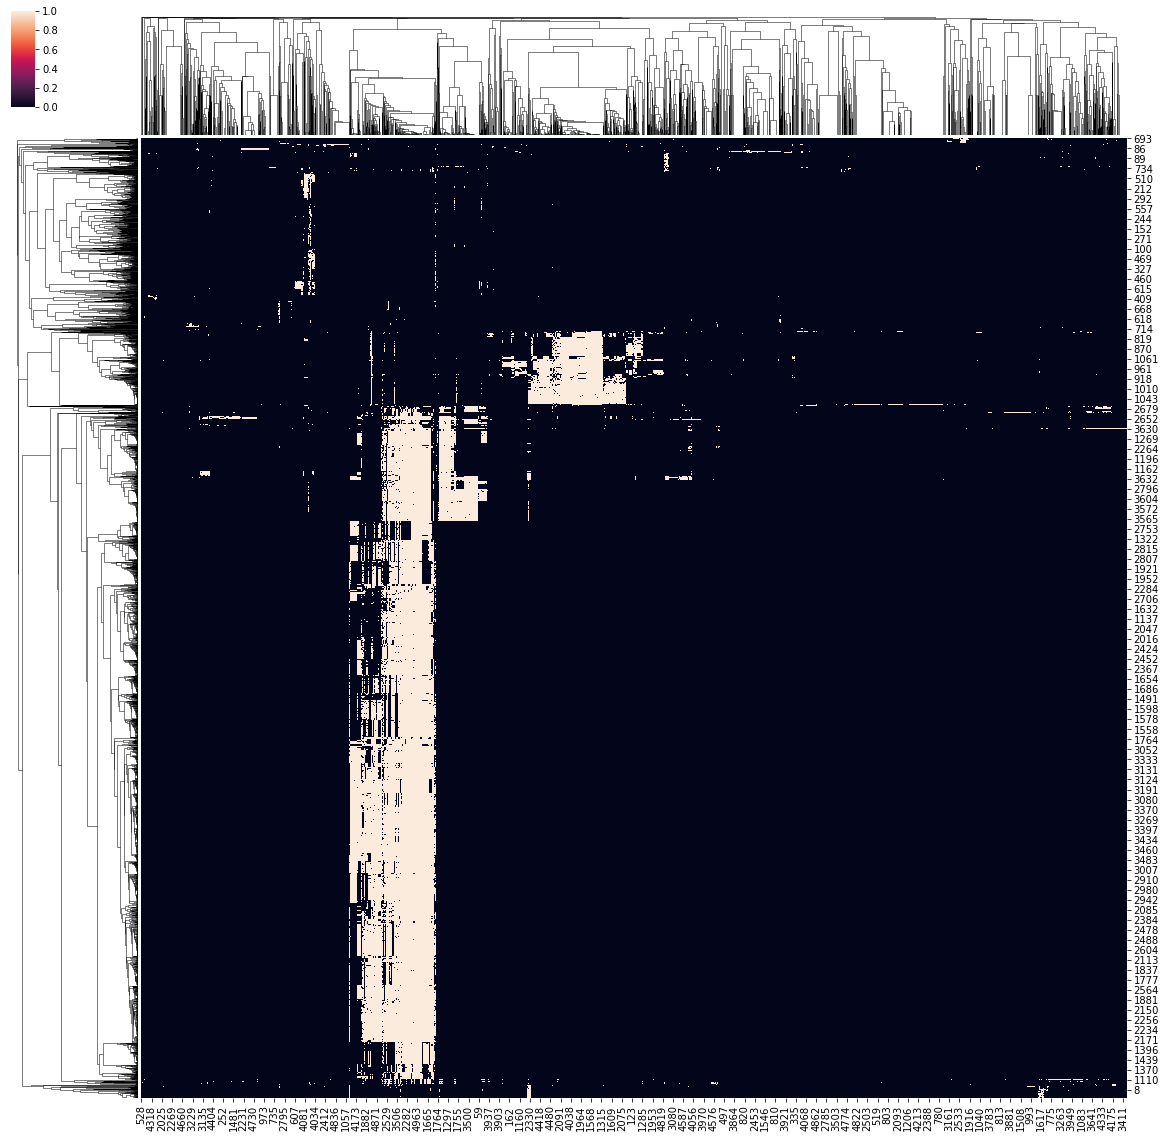

In [4]:
clustergrid = sns.clustermap(sig_biomarkers, figsize=(20,20), metric='braycurtis')
plt.savefig(PLOT_DIR + 'clusters_yogurt3' + title + '.png')

In [5]:
person_variant = np.array(np.load(PROJECT_DIR + '/results/person_biomarker/' + study  + 
                                  '_'  + str(msa_method) +  '_person_variant3_unique.npy'))

In [8]:
# Cluster Start and End are with respect to the SBB ID (y axis on the plot above.)
def PlotSBB_ASD(SBB_idx, logthresh=0, level='Family'):
    tax_table_sigs = tax_table.iloc[sig_biomarkers.columns[np.where(sig_biomarkers.loc[SBB_idx])[0]]]
    print(len(tax_table_sigs))
    print([(i, c / len(tax_table_sigs)) for i, c in Counter(tax_table_sigs[level]).most_common()][:4])
    print([(i, c / len(tax_table)) for i, c in Counter(tax_table[level]).most_common()][:4])

    f_abundance,ax_abundance = plt.subplots(figsize=(5,5))
    asd = person_variant[good_pairs_ids,idx_sig_biomarkers[SBB_idx]][true_phenos]
    nt = person_variant[good_pairs_ids, idx_sig_biomarkers[SBB_idx]][~true_phenos]
    asd_and_nt = person_variant[good_pairs_ids, idx_sig_biomarkers[SBB_idx]]
    ax_abundance.plot(nt, asd, '.')
    ax_abundance.plot(sorted(asd_and_nt), sorted(asd_and_nt), 'r--')
    ax_abundance.set_title(title)
    if logthresh:
        ax_abundance.set_yscale('symlog', linthreshy=logthresh)
        ax_abundance.set_xscale('symlog', linthreshx=logthresh)
    ax_abundance.set_xlabel('Abundance in Neurotypical Sibling')
    ax_abundance.set_ylabel('Abundance in ASD Sibling')
    f_abundance.savefig(PLOT_DIR + study + '_' +  title + '_' + str(SBB_idx) + '_abundance.png')
    f_abundance.show()

7
[('Bacteroidia', 0.7142857142857143), ('Clostridia', 0.2857142857142857)]
[('Clostridia', 0.6911442786069651), ('Bacteroidia', 0.10348258706467661), (nan, 0.04218905472636816), ('Actinobacteria', 0.036218905472636814)]


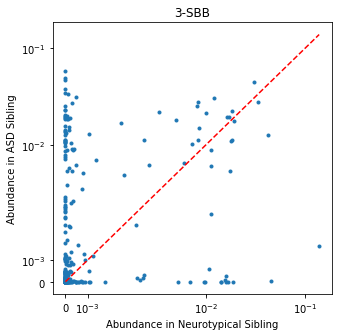

In [53]:
PlotSBB_ASD(244, logthresh=.005, level='Class')

25
[(nan, 0.36), ('Proteobacteria', 0.28), ('Bacteroidetes', 0.2), ('Actinobacteria', 0.08)]
[('Firmicutes', 0.7765174129353234), ('Bacteroidetes', 0.10467661691542289), ('Proteobacteria', 0.04417910447761194), ('Actinobacteria', 0.036218905472636814)]


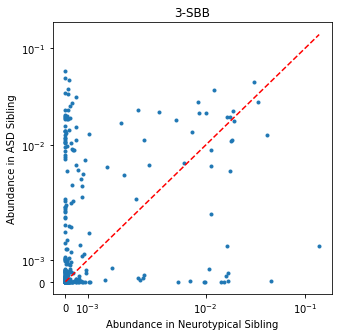

In [45]:
PlotSBB_ASD(510, logthresh=.005, level='Phylum')

249
[('Lachnospiraceae', 0.5903614457831325), ('Ruminococcaceae', 0.13253012048192772), ('Coriobacteriaceae', 0.0963855421686747), (nan, 0.060240963855421686)]
[('Lachnospiraceae', 0.3269651741293532), ('Ruminococcaceae', 0.21253731343283583), (nan, 0.13054726368159203), ('Porphyromonadaceae', 0.046567164179104475)]


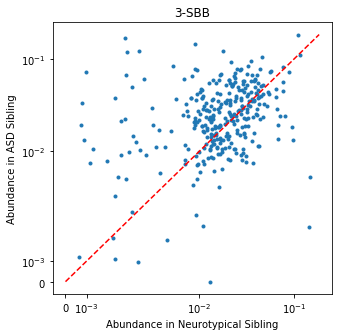

In [22]:
PlotSBB_ASD(1061, logthresh=.005)

171
[('Porphyromonadaceae', 0.9122807017543859), ('Rikenellaceae', 0.04678362573099415), (nan, 0.04093567251461988)]
[('Lachnospiraceae', 0.3269651741293532), ('Ruminococcaceae', 0.21253731343283583), (nan, 0.13054726368159203), ('Porphyromonadaceae', 0.046567164179104475)]


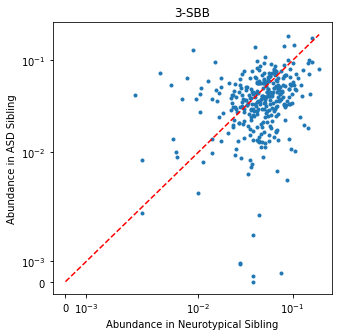

In [16]:
PlotSBB_ASD(1196, logthresh=.005)

In [67]:
# Cluster Start and End are with respect to the SBB ID (y axis on the plot above.)
def PlotSBB_ASD(SBB_idx, logthresh=0, level='Family'):
    person_variant = np.array(np.load(PROJECT_DIR + '/results/person_biomarker/' + study  + 
                                       '_'  + str(msa_method) +  '_person_variant3_unique.npy'))

    tax_table_sigs = tax_table.iloc[sig_biomarkers.columns[np.where(sig_biomarkers.loc[SBB_idx])[0]]]
    print(len(tax_table_sigs))
    print([(i, c / len(tax_table_sigs)) for i, c in Counter(tax_table_sigs[level]).most_common()][:4])
    print([(i, c / len(tax_table)) for i, c in Counter(tax_table[level]).most_common()][:4])

    f_abundance,ax_abundance = plt.subplots(figsize=(5,5))
    asd = person_variant_2[good_pairs_ids,idx_sig_biomarkers[SBB_idx]][true_phenos]
    nt = person_variant_2[good_pairs_ids, idx_sig_biomarkers[SBB_idx]][~true_phenos]
    asd_and_nt = person_variant_2[good_pairs_ids, idx_sig_biomarkers[SBB_idx]]
    ax_abundance.plot(nt, asd, '.')
    ax_abundance.plot(sorted(asd_and_nt), sorted(asd_and_nt), 'r--')
    ax_abundance.set_title(title)
    if logthresh:
        ax_abundance.set_yscale('symlog', linthreshy=logthresh)
        ax_abundance.set_xscale('symlog', linthreshx=logthresh)
    ax_abundance.set_xlabel('Abundance in Neurotypical Sibling')
    ax_abundance.set_ylabel('Abundance in ASD Sibling')
    f_abundance.savefig(PLOT_DIR + study + '_' +  title + '_' + str(SBB_idx) + '_abundance.png')
    f_abundance.show()

In [12]:
title='2-SBB'
study='yogurt'
U_data = np.load(PROJECT_DIR + '/results/sig_values/' + study +'_' + 'R_data' + title + '.npy')
U_permute = np.load(PROJECT_DIR + '/results/sig_values/' + study +'_' + 'R_permute' + title + '.npy')
U_threshs = np.linspace(0,.01,1000)
biomarkers_seqs = np.array(np.load(PROJECT_DIR + '/results/person_biomarker/' + study  + 
                                   '_'  + str(msa_method) +  '_biomarker_seq2.npy'))
fdr = np.array([np.mean(U_permute<=U_thresh)/np.mean(U_data<=U_thresh) for U_thresh in U_threshs])

U_thresh = .05/len(U_data)
#U_thresh = U_threshs[fdr<.05][0]
idx_sig_biomarkers = np.where(U_data<=U_thresh)[0]

#U_thresh = .025/len(U_data)
#idx_sig_biomarkers = np.concatenate([np.where(U_data>U_thresh)[0], idx_sig_biomarkers])

sig_biomarkers = pd.DataFrame(biomarkers_seqs[idx_sig_biomarkers, :])
print(np.shape(sig_biomarkers))
sig_biomarkers = sig_biomarkers[sig_biomarkers.columns[sig_biomarkers.sum(axis=0)>0]]
sig_biomarkers = sig_biomarkers.loc[sig_biomarkers.sum(axis=1)>0]#
print(np.shape(sig_biomarkers))

(126155, 5025)


IndexError: index 889114 is out of bounds for axis 0 with size 126155

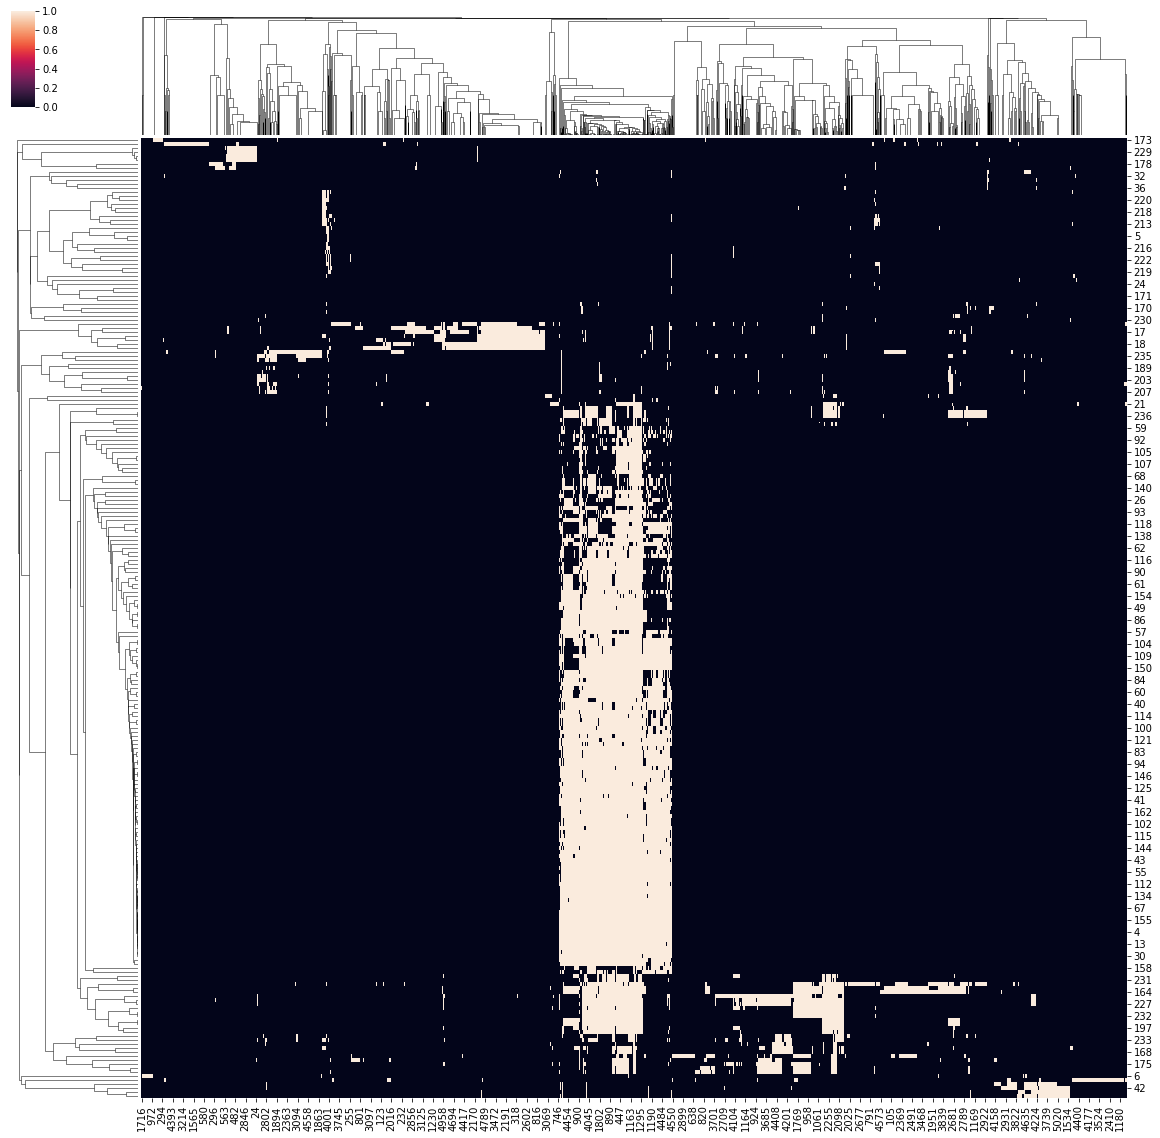

In [102]:
clustergrid = sns.clustermap(sig_biomarkers, figsize=(20,20), metric='braycurtis')
plt.savefig(PLOT_DIR + 'clusters_yogurt' + title + '.png')

In [120]:
# Cluster Start and End are with respect to the SBB ID (y axis on the plot above.)
def PlotSBB_ASD(SBB_idx, logthresh=0, level='Family'):
    person_variant = np.array(np.load(PROJECT_DIR + '/results/person_biomarker/' + study  + 
                                       '_'  + str(msa_method) +  '_person_variant2_unique.npy'))

    tax_table_sigs = tax_table.iloc[sig_biomarkers.columns[np.where(sig_biomarkers.loc[SBB_idx])[0]]]
    print(len(tax_table_sigs))
    print([(i, c / len(tax_table_sigs)) for i, c in Counter(tax_table_sigs[level]).most_common()][:4])
    print([(i, c / len(tax_table)) for i, c in Counter(tax_table[level]).most_common()][:4])

    f_abundance,ax_abundance = plt.subplots(figsize=(5,5))
    asd = person_variant_2[good_pairs_ids,idx_sig_biomarkers[SBB_idx]][true_phenos]
    nt = person_variant_2[good_pairs_ids, idx_sig_biomarkers[SBB_idx]][~true_phenos]
    asd_and_nt = person_variant_2[good_pairs_ids, idx_sig_biomarkers[SBB_idx]]
    ax_abundance.plot(nt, asd, '.')
    ax_abundance.plot(sorted(asd_and_nt), sorted(asd_and_nt), 'r--')
    ax_abundance.set_title(title)
    if logthresh:
        ax_abundance.set_yscale('symlog', linthreshy=logthresh)
        ax_abundance.set_xscale('symlog', linthreshx=logthresh)
    ax_abundance.set_xlabel('Abundance in Neurotypical Sibling')
    ax_abundance.set_ylabel('Abundance in ASD Sibling')
    f_abundance.savefig(PLOT_DIR + study + '_' +  title + '_' + str(SBB_idx) + '_abundance.png')
    f_abundance.show()

66
[('Ruminococcaceae', 0.9242424242424242), (nan, 0.06060606060606061), ('Lachnospiraceae', 0.015151515151515152)]
[('Lachnospiraceae', 0.3269651741293532), ('Ruminococcaceae', 0.21253731343283583), (nan, 0.13054726368159203), ('Porphyromonadaceae', 0.046567164179104475)]


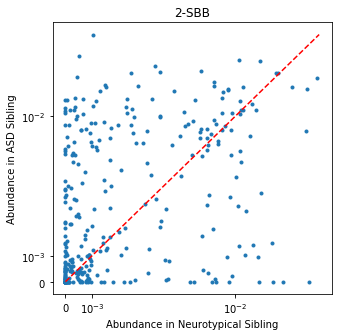

In [178]:
PlotSBB_ASD(229, logthresh=.005)

11
[('Bacteria', 0.9090909090909091), (nan, 0.09090909090909091)]
[('Bacteria', 0.9988059701492538), ('Archaea', 0.0007960199004975124), (nan, 0.0003980099502487562)]


/home/users/briannac/.local/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


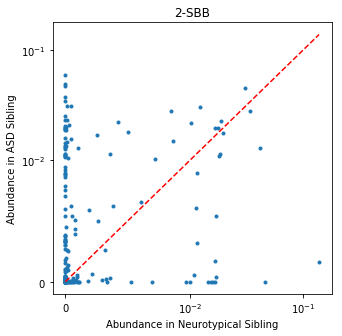

In [156]:
PlotSBB_ASD(218, logthresh=.01, level='Kingdom')

^ These are blastocytes.

285
[('Lachnospiraceae', 0.6736842105263158), ('Ruminococcaceae', 0.14736842105263157), (nan, 0.07719298245614035), ('Prevotellaceae', 0.0456140350877193)]
[('Lachnospiraceae', 0.3269651741293532), ('Ruminococcaceae', 0.21253731343283583), (nan, 0.13054726368159203), ('Porphyromonadaceae', 0.046567164179104475)]


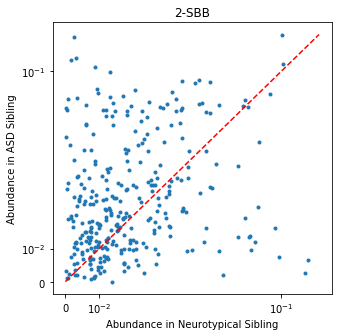

In [162]:
PlotSBB_ASD(17, logthresh=.05, level='Family')

229
[('Porphyromonadaceae', 0.7117903930131004), (nan, 0.12663755458515283), ('Lachnospiraceae', 0.0611353711790393), ('Ruminococcaceae', 0.056768558951965066)]
[('Lachnospiraceae', 0.3269651741293532), ('Ruminococcaceae', 0.21253731343283583), (nan, 0.13054726368159203), ('Porphyromonadaceae', 0.046567164179104475)]


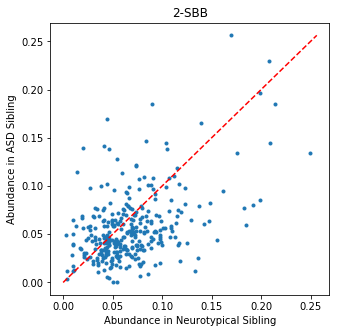

In [165]:
PlotSBB_ASD(146, level='Family')

146
[('Betaproteobacteria', 0.4657534246575342), ('Bacteroidia', 0.15753424657534246), (nan, 0.14383561643835616), ('Clostridia', 0.08904109589041095)]
[('Clostridia', 0.6911442786069651), ('Bacteroidia', 0.10348258706467661), (nan, 0.04218905472636816), ('Actinobacteria', 0.036218905472636814)]


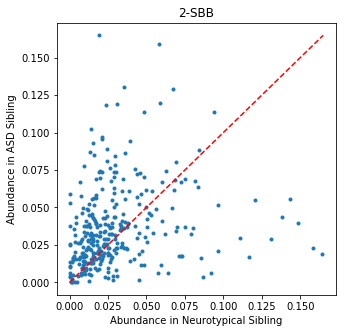

In [168]:
PlotSBB_ASD(42, level='Class')

# Obesity

In [8]:
### START HERE ####
study = 'obese_lean_twins'
msa_method = 'DECIPHER'
otus = pd.read_csv('/scratch/groups/dpwall/personal/briannac/sequence_based_biomarkers/data/' + study + '/otu.tsv', sep='\t')
otus.apply(lambda x: x/sum(x), axis=1).to_csv(
    '/scratch/groups/dpwall/personal/briannac/sequence_based_biomarkers/data/' + study + '/abundance.tsv', sep='\t')
tax_table = pd.read_csv('/scratch/groups/dpwall/personal/briannac/sequence_based_biomarkers/data/' + study + '/tax_table.tsv', sep='\t')

abundance = pd.read_csv('/scratch/groups/dpwall/personal/briannac/sequence_based_biomarkers/data/' + study + '/abundance.tsv', sep='\t')
person_vs_pheno = pd.read_csv('/scratch/groups/dpwall/personal/briannac/sequence_based_biomarkers/data/' + study + '/sample_data.tsv', sep='\t')
abundance.index = abundance['Unnamed: 0']
abundance = abundance.drop('Unnamed: 0', axis=1)

person_vs_pheno = pd.read_csv('/scratch/groups/dpwall/personal/briannac/sequence_based_biomarkers/data/' + study + '/sample_data.tsv', sep='\t')
person_vs_pheno['pheno'] = person_vs_pheno['obesitycat']=='Obese'
good_ids = (person_vs_pheno['obesitycat']!='Overweight').values & ((abundance>0).sum(1)>10).values

person_vs_pheno = person_vs_pheno[good_ids]

In [9]:
# Taxa aggregated by taxa category
person_variant_species = np.array(abundance.transpose().join(tax_table).groupby('Species').aggregate(sum).transpose())
person_variant_genus = np.array(abundance.transpose().join(tax_table).groupby('Genus').aggregate(sum).transpose())
person_variant_family = np.array(abundance.transpose().join(tax_table).groupby('Family').aggregate(sum).transpose())
person_variant_order = np.array(abundance.transpose().join(tax_table).groupby('Order').aggregate(sum).transpose())
person_variant_class = np.array(abundance.transpose().join(tax_table).groupby('Class').aggregate(sum).transpose())
person_variant_phylum = np.array(abundance.transpose().join(tax_table).groupby('Phylum').aggregate(sum).transpose())
person_variant_kingdom = np.array(abundance.transpose().join(tax_table).groupby('Kingdom').aggregate(sum).transpose())

person_variant_1 = np.array(np.load(PROJECT_DIR + '/results/person_biomarker/' + study  + 
                                   '_'  + str(msa_method) +  '_person_variant1_unique.npy'))
person_variant_2 = np.array(np.load(PROJECT_DIR + '/results/person_biomarker/' + study  + 
                                   '_'  + str(msa_method) +  '_person_variant2_unique.npy'))
person_variant_3 = np.array(np.load(PROJECT_DIR + '/results/person_biomarker/' + study  + 
                                   '_'  + str(msa_method) +  '_person_variant3_unique.npy'))

biomarkers_seqs_1 = np.array(np.load(PROJECT_DIR + '/results/person_biomarker/' + study  + 
                                   '_'  + str(msa_method) +  '_biomarker_seq1.npy'))

biomarkers_seqs_2 = np.array(np.load(PROJECT_DIR + '/results/person_biomarker/' + study  + 
                                   '_'  + str(msa_method) +  '_biomarker_seq2.npy'))
biomarkers_seqs_3 = np.array(np.load(PROJECT_DIR + '/results/person_biomarker/' + study  + 
                                   '_'  + str(msa_method) +  '_biomarker_seq3.npy'))

true_phenos = person_vs_pheno['pheno'].values

In [1]:
person_vs_pheno_dict = {i:j for i,j in zip(person_vs_pheno['family'], person_vs_pheno['pheno'])}
k = list(person_vs_pheno_dict.keys())
v = list(person_vs_pheno_dict.values())
f_FDR,ax_FDR = plt.subplots(figsize=(10,5))
f_FDR2,ax_FDR2 = plt.subplots(figsize=(10,5))
f_qq,ax_qq = plt.subplots(figsize=(10,5))

for person_variant, title in [(person_variant_species, 'species'), (person_variant_genus, 'genus'),  (person_variant_family, 'family'),  (person_variant_order, 'order'), (person_variant_class, 'class'),
    (person_variant_1, '1-SBB'),(person_variant_2, '2-SBB'),(person_variant_3, '3-SBB')]:
    print(title)
    
    # Compute Statistics
    person_variant = person_variant[good_ids]

    
    # Statistics
    U_data = np.zeros(np.shape(person_variant)[1])
    n1 = sum(true_phenos)
    N = len(true_phenos)
    print(sum(true_phenos))
    for i  in range(np.shape(person_variant)[1]):
        vals = person_variant[:, i]
        if sum(vals)==0:
            U_data[i]=FAKE_P_VAL
            continue
        _, pval = mannwhitneyu(vals[true_phenos], vals[~true_phenos])
        if np.isnan(pval):
            U_data[i] = FAKE_P_VAL
        else: U_data[i] = pval
    U_data_na = U_data[U_data!=FAKE_P_VAL]
    
    U_permute = np.zeros((np.shape(person_variant)[1], N_ITER))
    n_permute_gt_r = np.zeros(np.shape(person_variant)[1])
    for r in tqdm.tqdm(range(N_ITER)):
        np.random.shuffle(v)    
        new_pheno_dict = {i:j for i,j in zip(k,v)}
        new_phenos = np.array([new_pheno_dict[i] for i in person_vs_pheno['family']])
        while sum(new_phenos)!=sum(true_phenos): ## Make sure there are always the same # of obese vs lean
            np.random.shuffle(v)    
            new_pheno_dict = {i:j for i,j in zip(k,v)}
            new_phenos = np.array([new_pheno_dict[i] for i in person_vs_pheno['family']])
        print(sum(new_phenos))
        for i in range(np.shape(person_variant)[1]):
            vals = person_variant[:, i]
            if sum(vals)==0: 
                U_data[i]=FAKE_P_VAL
                continue
            _, pval = mannwhitneyu(vals[new_phenos], vals[~new_phenos])
            if np.isnan(pval):
                U_permute[i,r] = FAKE_P_VAL
            else: U_permute[i,r] = pval
    U_permute = U_permute.flatten()
    U_permute_na = U_permute[U_permute!=FAKE_P_VAL]
    
    
    
    
    U_threshs = np.linspace(.5,0,100)
    fdr = [np.mean(U_permute_na<=U_thresh)/np.mean(U_data_na<=U_thresh) for U_thresh in U_threshs]
    num_hits = [np.sum(U_data_na<=U_thresh) for U_thresh in U_threshs]
    frac_hits = [np.mean(U_data_na<=U_thresh) for U_thresh in U_threshs]
    fdr = np.array([max(fdr[f:]) for f in range(len(fdr))])
    fdr, fdr_idx = np.unique(fdr, return_index=True)
    num_hits = np.array(num_hits)[fdr_idx]
    frac_hits = np.array(frac_hits)[fdr_idx]
    
    ax_FDR.plot(fdr, num_hits, 'x-', label=title)
    ax_FDR2.plot(fdr, frac_hits, 'x-', label=title)

    pvals = n_permute_gt_r/N_ITER
    reject, adjusted_pvals, _, _ = multipletests(pvals, alpha=0.2, method='fdr_bh', is_sorted=False, returnsorted=False)
    
    #### Plot histogram of R values. ####
    plt.figure()
    plt.hist(U_data_na, alpha=.5, density=True, bins=np.linspace(0,1,100))
    plt.hist(U_permute_na, alpha=.5, density=True, bins=np.linspace(0,1,100))
    plt.xlabel('P Value')
    plt.ylabel('Freq')
    plt.savefig(PLOT_DIR + 'yogurt_' + title + '_histogram.png')
    
    
    quantiles_data = np.array([np.percentile(U_data, p) for p in np.linspace(0,100,1000)])
    quantiles_permute = np.array([np.percentile(U_permute, p) for p in np.linspace(0,100,1000)])
    ax_qq.plot(quantiles_permute, quantiles_data, '-', label=title)
    ax_qq.plot(quantiles_permute, quantiles_permute, 'k--')
    
    np.save(PROJECT_DIR + '/results/sig_values/obese_lean_twins_' + 'U_permute' + title + '.npy',U_permute.flatten())
    np.save(PROJECT_DIR + '/results/sig_values/obese_lean_twins_' + 'U_data' + title + '.npy',U_data)

    i_sig = np.argmin(U_data)
    print(min(pvals)*len(pvals))
    df = pd.DataFrame([person_variant[:,i_sig], ['Obese' if t else 'Lean' for t in true_phenos]]).transpose()
    df.columns = ['val', 'pheno']
    df['val'] = df['val'].astype(float)
    
ax_FDR.set_yscale('log')    
ax_FDR.set_ylabel('# Significant SBBs')  # we already handled the x-label with ax1
ax_FDR.set_xlabel('FDR')  # we already handled the x-label with ax1
ax_FDR.set_xlim((0,.2))  # we already handled the x-label with ax1

ax_FDR2.set_ylabel('Fraction Significant SBBs')  # we already handled the x-label with ax1
ax_FDR2.set_xlabel('FDR')  # we already handled the x-label with ax1
ax_FDR2.set_yscale('log')    
ax_FDR2.set_xlim((0,.2))  # we already handled the x-label with ax1


ax_qq.set_ylabel('True Quantile' )  # we already handled the x-label with ax1
ax_qq.set_xlabel('Theoretical Quantile')  # we already handled the x-label with ax1
f_qq.legend()
f_qq.savefig(PLOT_DIR + 'obese_QQ.png')
f_qq.show()

f_FDR.legend()
f_FDR.savefig(PLOT_DIR + 'obese_FDR_num.png')
f_FDR.show()
f_FDR2.legend()
f_FDR2.savefig(PLOT_DIR + 'obese_FDR_frac.png')
f_FDR2.show()
   
    
### END ####


NameError: name 'person_vs_pheno' is not defined

In [10]:
title='2-SBB'
study='obese_lean_twins'
U_data = np.load(PROJECT_DIR + '/results/sig_values/' + study +'_' + 'U_data' + title + '.npy')
U_permute = np.load(PROJECT_DIR + '/results/sig_values/' + study +'_' + 'U_permute' + title + '.npy')
U_threshs = np.linspace(0,.01,1000)
biomarkers_seqs = np.array(np.load(PROJECT_DIR + '/results/person_biomarker/' + study  + 
                                   '_'  + str(msa_method) +  '_biomarker_seq2.npy'))
fdr = np.array([np.mean(U_permute<=U_thresh)/np.mean(U_data<=U_thresh) for U_thresh in U_threshs])

U_thresh = .05/len(U_data)
#U_thresh = U_threshs[fdr<.2][0]
idx_sig_biomarkers = np.where(U_data<=U_thresh)[0]

#U_thresh = sorted(U_data)[-10]
#idx_sig_biomarkers = np.concatenate([np.where(U_data>U_thresh)[0], idx_sig_biomarkers])

sig_biomarkers = pd.DataFrame(biomarkers_seqs[idx_sig_biomarkers, :])
print(np.shape(sig_biomarkers))
sig_biomarkers = sig_biomarkers[sig_biomarkers.columns[sig_biomarkers.sum(axis=0)>0]]
sig_biomarkers = sig_biomarkers.loc[sig_biomarkers.sum(axis=1)>0]#
print(np.shape(sig_biomarkers))

/home/users/briannac/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


(386, 2869)
(386, 1950)


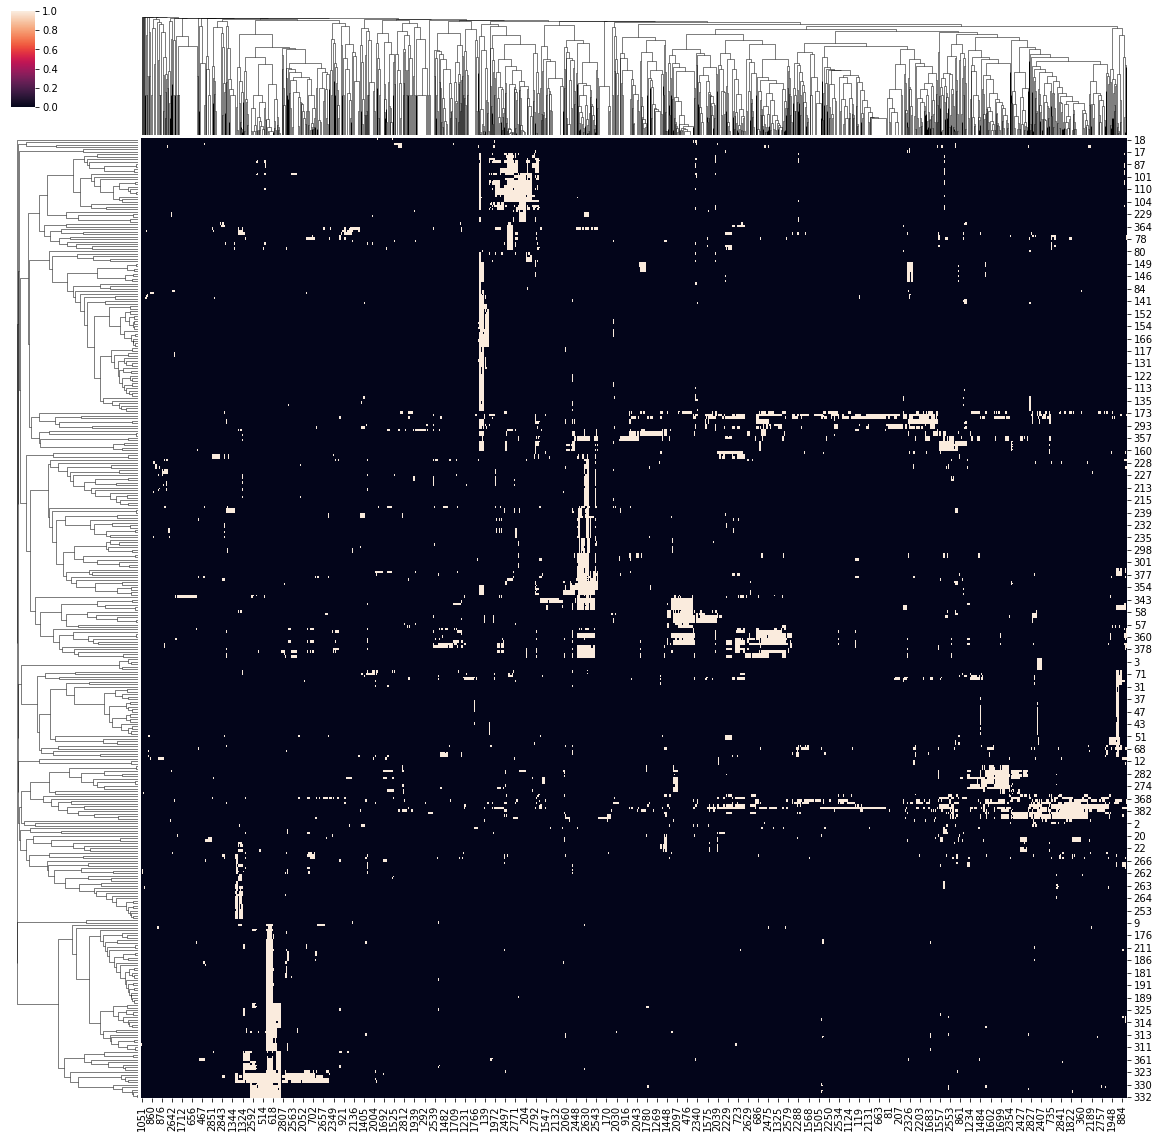

In [11]:
clustergrid = sns.clustermap(sig_biomarkers, figsize=(20,20), metric='braycurtis')
plt.savefig(PLOT_DIR + 'clusters_obese' + title + '.png')

In [26]:
# Cluster Start and End are with respect to the SBB ID (y axis on the plot above.)
def PlotSBB_obese(SBB_idx, logthresh=0, level='Family'):
    person_variant = np.array(np.load(PROJECT_DIR + '/results/person_biomarker/' + study  + 
                                       '_'  + str(msa_method) +  '_person_variant2_unique.npy'))

    tax_table_sigs = tax_table.iloc[sig_biomarkers.columns[np.where(sig_biomarkers.iloc[SBB_idx])[0]]]
    print(len(tax_table_sigs))
    print([(i, c / len(tax_table_sigs)) for i, c in Counter(tax_table_sigs[level]).most_common()][:4])
    print([(i, c / len(tax_table)) for i, c in Counter(tax_table[level]).most_common()][:4])

    enriched_obese = tax_table_sigs.index
    df = pd.DataFrame([person_variant[good_ids,idx_sig_biomarkers[SBB_idx]], ['Obese' if t else 'Lean' for t in true_phenos]]).transpose()
    df.columns = ['val', 'pheno']
    df['val'] = df['val'].astype(float)
    plt.subplots(figsize=(5,5))
    if logthresh:
        plt.yscale('symlog', linthreshy=logthresh)
    sns.swarmplot(data=df, x='pheno', y='val')
    sns.boxplot(data=df, x='pheno', y='val', boxprops=dict(alpha=.5))
    plt.ylabel('Abundance')
    plt.xlabel('Phenotype')
    plt.savefig(PLOT_DIR + study + '_' +  title + '_' + str(SBB_idx) + '_abundance.png')

In [2]:
#PlotSBB_obese(101, logthresh=.01, level='Class')

23
[('Rikenellaceae', 0.782608695652174), (nan, 0.08695652173913043), ('Lachnospiraceae', 0.043478260869565216), ('Ruminococcaceae', 0.043478260869565216)]
[('Lachnospiraceae', 0.2725688393168351), (nan, 0.1753224119902405), ('Ruminococcaceae', 0.11571976298361798), ('Bacteroidaceae', 0.09654932032066922)]


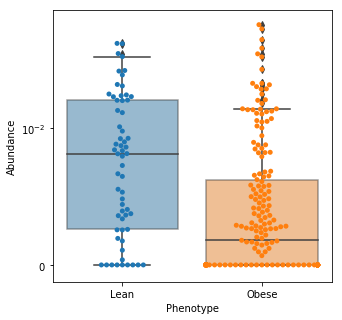

In [32]:
PlotSBB_obese(298, logthresh=.01)

In [4]:
PlotSBB_obese(282, logthresh=.01, level='Class')

NameError: name 'PlotSBB_obese' is not defined

Lean children enriched for *Bacteroides* / Rikenellacaea*

217
[('Clostridia', 0.8387096774193549), (nan, 0.10138248847926268), ('Bacteroidia', 0.059907834101382486)]
[('Clostridia', 0.6479609620076682), ('Bacteroidia', 0.16591146741024748), ('Bacilli', 0.07459044963401883), (nan, 0.028232833739979087)]


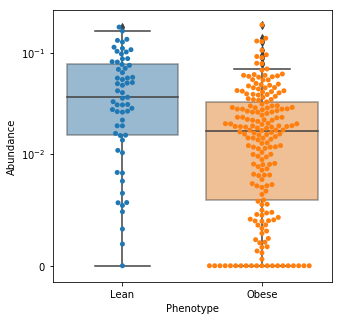

In [34]:
PlotSBB_obese(382, logthresh=.01, level="Class")

Obese children enriched for unknown order of Clostridia.

15
[('Megasphaera', 0.9333333333333333), (nan, 0.06666666666666667)]
[(nan, 0.3858487277797142), ('Faecalibacterium', 0.0512373649355176), ('Bacteroides', 0.03903799233182294), ('Prevotella', 0.02858138724294179)]


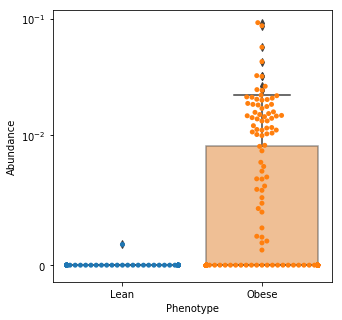

In [35]:
PlotSBB_obese(191, logthresh=.01, level='Genus')